In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [158]:
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [160]:
df.head(4)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [161]:
df['Survived_1_year'].value_counts()

1    14603
0     8494
Name: Survived_1_year, dtype: int64

In [162]:
df['Survived_1_year'].value_counts()/len(df)*100

1    63.224661
0    36.775339
Name: Survived_1_year, dtype: float64

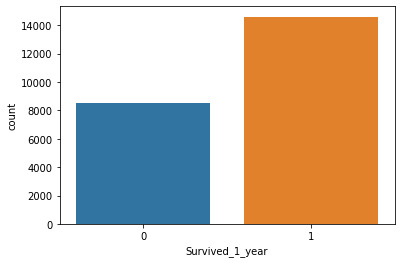

In [163]:
sns.countplot(df['Survived_1_year'])

In [164]:
df.shape

(23097, 18)

In [165]:
df.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [166]:
df.isnull().sum() /len(df)*100

ID_Patient_Care_Situation    0.000000
Diagnosed_Condition          0.000000
Patient_ID                   0.000000
Treated_with_drugs           0.056284
Patient_Age                  0.000000
Patient_Body_Mass_Index      0.000000
Patient_Smoker               0.000000
Patient_Rural_Urban          0.000000
Patient_mental_condition     0.000000
A                            5.347015
B                            5.347015
C                            5.347015
D                            5.347015
E                            5.347015
F                            5.347015
Z                            5.347015
Number_of_prev_cond          5.347015
Survived_1_year              0.000000
dtype: float64

In [167]:
df[df['A'].isnull()]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
27,4691,31,4500,DX2,44,27.935658,YES,URBAN,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
36,4869,28,6826,DX1,4,17.342624,NO,URBAN,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
41,32899,24,7275,DX2 DX5,12,20.994843,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
97,9311,13,7538,DX2,49,26.641499,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
105,13511,44,7903,DX4,41,28.079769,YES,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23002,6195,3,7812,DX2,26,26.548517,YES,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23012,20220,48,12318,DX4,15,18.849124,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23024,25571,6,3423,DX2,13,24.343030,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23038,644,30,8032,DX3 DX5,45,19.272509,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [168]:
df_nnull = df.drop(df[df['A'].isnull()].index, axis=0)

In [169]:
df.shape[0] - df_nnull.shape[0]

1235

In [170]:
df_nnull.head(4)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [171]:
df_nnull.isnull().sum() /len(df)*100

ID_Patient_Care_Situation    0.000000
Diagnosed_Condition          0.000000
Patient_ID                   0.000000
Treated_with_drugs           0.056284
Patient_Age                  0.000000
Patient_Body_Mass_Index      0.000000
Patient_Smoker               0.000000
Patient_Rural_Urban          0.000000
Patient_mental_condition     0.000000
A                            0.000000
B                            0.000000
C                            0.000000
D                            0.000000
E                            0.000000
F                            0.000000
Z                            0.000000
Number_of_prev_cond          0.000000
Survived_1_year              0.000000
dtype: float64

In [172]:
df[df['Treated_with_drugs'].isnull()]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
4,33012,0,12513,NaN,128,1.3484,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
218,33008,0,12509,NaN,112,1.2925,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2540,33014,0,12515,NaN,149,1.7784,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2711,33004,0,12505,NaN,123,1.9290,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
4308,33001,0,12502,NaN,114,1.6239,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
4887,33011,0,12512,NaN,132,1.9896,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
6308,33010,0,12511,NaN,142,1.5701,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
10388,33006,0,12507,NaN,138,1.3745,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
10663,33009,0,12510,NaN,142,1.1450,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
12782,33000,0,12501,NaN,112,1.5465,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [173]:
print(df_nnull[df_nnull['Patient_Smoker']=='Cannot say'].shape)
df_nnull[df_nnull['Treated_with_drugs'].isnull() ].shape

(13, 18)


(13, 18)

In [174]:
df_nnull[df_nnull['Patient_Smoker']=='Cannot say'].equals(df_nnull[df_nnull['Treated_with_drugs'].isnull() ])

True

In [175]:
df_nnull[df_nnull['Treated_with_drugs'].isnull() ]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
4,33012,0,12513,NaN,128,1.3484,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
218,33008,0,12509,NaN,112,1.2925,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2540,33014,0,12515,NaN,149,1.7784,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2711,33004,0,12505,NaN,123,1.9290,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
4308,33001,0,12502,NaN,114,1.6239,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
4887,33011,0,12512,NaN,132,1.9896,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
6308,33010,0,12511,NaN,142,1.5701,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
10388,33006,0,12507,NaN,138,1.3745,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
10663,33009,0,12510,NaN,142,1.1450,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
12782,33000,0,12501,NaN,112,1.5465,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [176]:
df_nnull['Treated_with_drugs'].describe()

count     21849
unique       32
top         DX6
freq       8148
Name: Treated_with_drugs, dtype: object

In [177]:
df_nnull['Patient_Smoker'].value_counts() / len(df_nnull)

NO            0.572637
YES           0.426768
Cannot say    0.000595
Name: Patient_Smoker, dtype: float64

In [178]:
df_clean = df_nnull.drop(df_nnull[df_nnull['Patient_Smoker']=='Cannot say'].index,axis=0)

In [179]:
df_clean = df_clean.drop("Patient_ID",axis=1)

In [180]:
df_clean = df_clean.drop("Z",axis=1)

In [181]:
df_clean.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64



---



---



EDA

In [182]:
df_clean.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Number_of_prev_cond,Survived_1_year
count,21849.000000,21849.000000,21849.000000,21849.000000,21849.000000,21849.000000,21849.000000,21849.000000,21849.000000,21849.000000,21849.000000,21849.000000
mean,16516.195066,26.399469,33.232230,23.453391,0.898439,0.136436,0.185180,0.083665,0.393473,0.053732,1.750927,0.624376
std,9533.314321,15.025344,19.406999,3.774410,0.302077,0.343259,0.388452,0.276891,0.488531,0.225494,0.770323,0.484295
min,2.000000,1.000000,0.000000,17.000336,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8232.000000,13.000000,16.000000,20.205050,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16577.000000,26.000000,33.000000,23.368735,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24798.000000,39.000000,50.000000,26.775992,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
max,32982.000000,52.000000,66.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [183]:
numeric_features = df_clean.select_dtypes(include=[np.number])
numeric_features.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_Age',
       'Patient_Body_Mass_Index', 'A', 'B', 'C', 'D', 'E', 'F',
       'Number_of_prev_cond', 'Survived_1_year'],
      dtype='object')

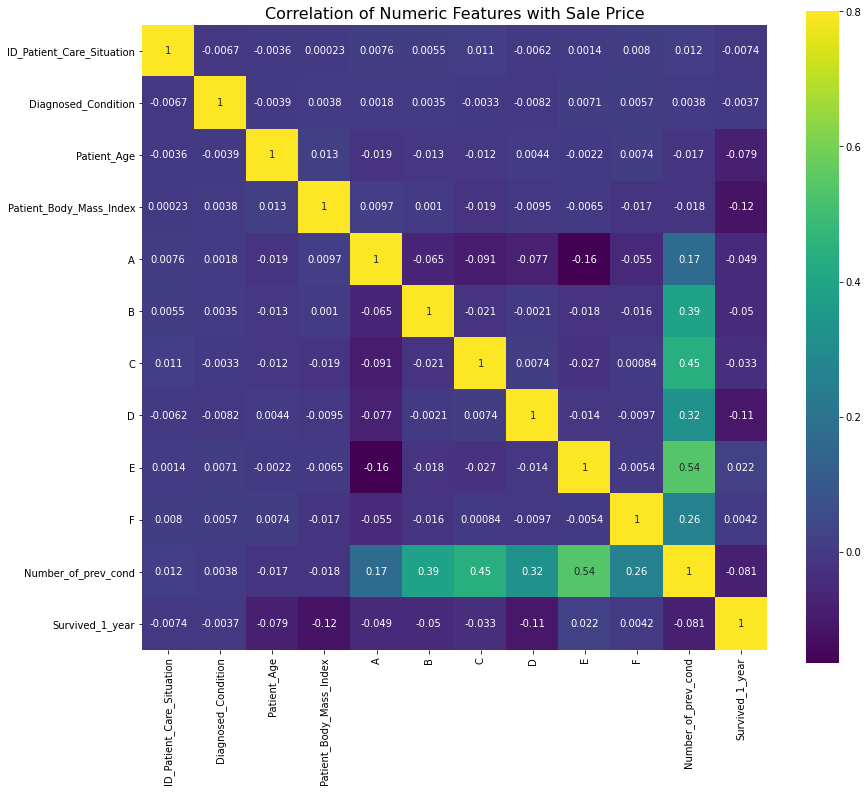

In [184]:
f , ax = plt.subplots(figsize = (14,12))
correlation = df_clean.corr()
plt.title('Correlation of Numeric Features with Sale Price',y=1,size=16)
sns.heatmap(correlation,square = True,annot=True,  vmax=0.8,linecolor="white",cmap="viridis")

Index(['Survived_1_year', 'E', 'F', 'Diagnosed_Condition',
       'ID_Patient_Care_Situation', 'C', 'A', 'B', 'Patient_Age',
       'Number_of_prev_cond'],
      dtype='object')


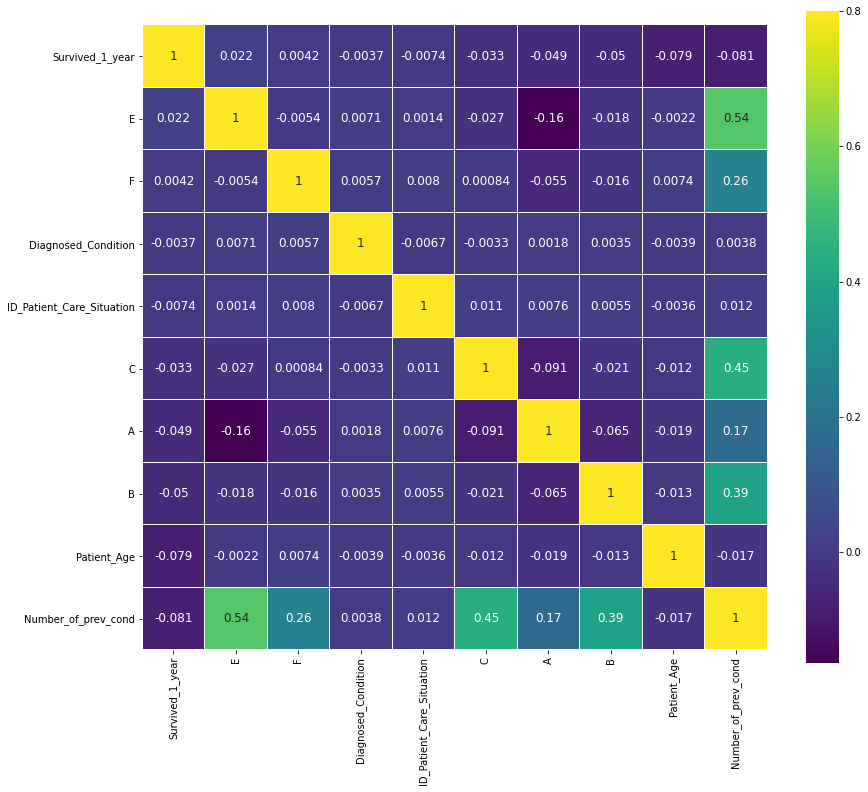

In [185]:
k=10
cols = correlation.nlargest(k,'Survived_1_year')['Survived_1_year'].index
print(cols)
cm = np.corrcoef(df_clean[cols].values.T)
f ,ax = plt.subplots(figsize=(14,12))
sns.heatmap(cm,vmax=.8,linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels=cols.values,annot_kws={'size':12},
            yticklabels=cols.values)

In [186]:
df_clean.head(4)

,ID_Patient_Care_Situation,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Number_of_prev_cond,Survived_1_year
0,22374,8,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0
1,18164,5,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [187]:
df_clean.dtypes

ID_Patient_Care_Situation      int64
Diagnosed_Condition            int64
Treated_with_drugs            object
Patient_Age                    int64
Patient_Body_Mass_Index      float64
Patient_Smoker                object
Patient_Rural_Urban           object
Patient_mental_condition      object
A                            float64
B                            float64
C                            float64
D                            float64
E                            float64
F                            float64
Number_of_prev_cond          float64
Survived_1_year                int64
dtype: object

In [188]:
col_cat  =['Treated_with_drugs','Patient_Smoker','Patient_Rural_Urban','Patient_mental_condition']



In [189]:
from sklearn.preprocessing import OneHotEncoder

In [190]:
enc_dummies = df_clean.copy()

In [191]:
for i in col_cat:
  enc_dummies = pd.get_dummies(enc_dummies,columns=[i],prefix=[i])

In [192]:
enc_dummies.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Number_of_prev_cond,Survived_1_year,Treated_with_drugs_DX1,Treated_with_drugs_DX1 DX2,Treated_with_drugs_DX1 DX2 DX3,Treated_with_drugs_DX1 DX2 DX3 DX4,Treated_with_drugs_DX1 DX2 DX3 DX4 DX5,Treated_with_drugs_DX1 DX2 DX3 DX5,Treated_with_drugs_DX1 DX2 DX4,Treated_with_drugs_DX1 DX2 DX4 DX5,Treated_with_drugs_DX1 DX2 DX5,Treated_with_drugs_DX1 DX3,Treated_with_drugs_DX1 DX3 DX4,Treated_with_drugs_DX1 DX3 DX4 DX5,Treated_with_drugs_DX1 DX3 DX5,Treated_with_drugs_DX1 DX4,Treated_with_drugs_DX1 DX4 DX5,Treated_with_drugs_DX1 DX5,Treated_with_drugs_DX2,Treated_with_drugs_DX2 DX3,Treated_with_drugs_DX2 DX3 DX4,Treated_with_drugs_DX2 DX3 DX4 DX5,Treated_with_drugs_DX2 DX3 DX5,Treated_with_drugs_DX2 DX4,Treated_with_drugs_DX2 DX4 DX5,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable
0,22374,8,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1
1,18164,5,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
2,6283,23,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1
3,5339,51,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
5,10808,45,47,26.155120,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1


In [193]:
enc_dummies.head(4)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Number_of_prev_cond,Survived_1_year,Treated_with_drugs_DX1,Treated_with_drugs_DX1 DX2,Treated_with_drugs_DX1 DX2 DX3,Treated_with_drugs_DX1 DX2 DX3 DX4,Treated_with_drugs_DX1 DX2 DX3 DX4 DX5,Treated_with_drugs_DX1 DX2 DX3 DX5,Treated_with_drugs_DX1 DX2 DX4,Treated_with_drugs_DX1 DX2 DX4 DX5,Treated_with_drugs_DX1 DX2 DX5,Treated_with_drugs_DX1 DX3,Treated_with_drugs_DX1 DX3 DX4,Treated_with_drugs_DX1 DX3 DX4 DX5,Treated_with_drugs_DX1 DX3 DX5,Treated_with_drugs_DX1 DX4,Treated_with_drugs_DX1 DX4 DX5,Treated_with_drugs_DX1 DX5,Treated_with_drugs_DX2,Treated_with_drugs_DX2 DX3,Treated_with_drugs_DX2 DX3 DX4,Treated_with_drugs_DX2 DX3 DX4 DX5,Treated_with_drugs_DX2 DX3 DX5,Treated_with_drugs_DX2 DX4,Treated_with_drugs_DX2 DX4 DX5,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable
0,22374,8,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1
1,18164,5,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
2,6283,23,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1
3,5339,51,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [194]:
enc_dummies = enc_dummies.drop('ID_Patient_Care_Situation',axis=1)

In [195]:
X = enc_dummies.drop("Survived_1_year",axis=1)
y = enc_dummies['Survived_1_year']



---

# SPLIT

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=6)

In [42]:
print("X_train"+str(X_train.shape)+" y_train "+str(y_train.shape))
print("X_test"+str(X_test.shape)+" y_test "+str(y_test.shape))

X_train(16386, 47) y_train (16386,)
X_test(5463, 47) y_test (5463,)




---

## MODEL

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

In [44]:
logreg = LogisticRegression(n_jobs=-1)

In [45]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred = logreg.predict(X_test)

In [47]:
print("Acurracy Base",accuracy_score(y_test,y_pred))
print("F1 BAse",f1_score(y_test,y_pred))


Acurracy Base 0.7411678564891085
F1 BAse 0.8072519083969465


# Feature Selection

---



---



In [48]:
from sklearn.feature_selection import RFE

In [49]:
rfe = RFE(estimator= logreg,step=1)

fit  =rfe.fit(X_train,y_train)

print("Num features %d"%fit.n_features_)
print("Selected features %s"% fit.support_)
print("Feature ranking: %s"% fit.ranking_)

Num features 23
Selected features [False False False False False False  True  True  True  True False  True
  True  True False False False False  True  True  True False  True False
  True  True False False False False  True False  True  True False False
  True  True False False  True  True  True  True  True False False]
Feature ranking: [24 25 15  4 13 19  1  1  1  1 23  1  1  1 18 20  8 21  1  1  1  3  1 22
  1  1  9 14 16 17  1  6  1  1 11 10  1  1  5  2  1  1  1  1  1 12  7]


In [50]:
selected_rfe = pd.DataFrame({"Feature":list(X_train.columns),
                             "Ranking":rfe.ranking_})
selected_rfe.sort_values(by="Ranking",ascending=False)

,Feature,Ranking
1,Patient_Age,25
0,Diagnosed_Condition,24
10,Treated_with_drugs_DX1,23
23,Treated_with_drugs_DX1 DX4,22
17,Treated_with_drugs_DX1 DX2 DX4 DX5,21
15,Treated_with_drugs_DX1 DX2 DX3 DX5,20
5,C,19
14,Treated_with_drugs_DX1 DX2 DX3 DX4 DX5,18
29,Treated_with_drugs_DX2 DX3 DX4 DX5,17
28,Treated_with_drugs_DX2 DX3 DX4,16


In [51]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)



In [52]:
print(X_train_rfe.shape,X_train.shape)

(16386, 23) (16386, 47)


In [53]:
logreg.fit(X_train_rfe,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
print("Acurracy Base",accuracy_score(y_test,logreg.predict(X_test_rfe)))
print("F1 BAse",f1_score(y_test,logreg.predict(X_test_rfe)))

Acurracy Base 0.7268899871865275
F1 BAse 0.7985961123110151




---
# Tuning hyperparamateres


In [55]:
params = {
    "penalty": ["l1","l2","elasticnet","none"],
    "solver": ["newton-cg","lbfgs","liblinear","sag","saga"],
    
}

In [56]:
log_CV = LogisticRegression(n_jobs=-1)

In [57]:
search = GridSearchCV(log_CV,params,cv=5,verbose=2)

In [58]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] penalty=l1, solver=newton-cg ....................................
[CV] ..................... penalty=l1, solver=newton-cg, total=   0.0s
[CV] penalty=l1, solver=newton-cg ....................................
[CV] ..................... penalty=l1, solver=newton-cg, total=   0.0s
[CV] penalty=l1, solver=newton-cg ....................................
[CV] ..................... penalty=l1, solver=newton-cg, total=   0.0s
[CV] penalty=l1, solver=newton-cg ....................................
[CV] ..................... penalty=l1, solver=newton-cg, total=   0.0s
[CV] penalty=l1, solver=newton-cg ....................................
[CV] ..................... penalty=l1, solver=newton-cg, total=   0.0s
[CV] penalty=l1, solver=lbfgs ........................................
[CV] ......................... penalty=l1, solver=lbfgs, total=   0.0s
[CV] penalty=l1, solver=lbfgs ........................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(ef

[CV] ..................... penalty=l1, solver=liblinear, total=   0.9s
[CV] penalty=l1, solver=liblinear ....................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV] ..................... penalty=l1, solver=liblinear, total=   1.0s
[CV] penalty=l1, solver=liblinear ....................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV] ..................... penalty=l1, solver=liblinear, total=   0.9s
[CV] penalty=l1, solver=liblinear ....................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV] ..................... penalty=l1, solver=liblinear, total=   0.8s
[CV] penalty=l1, solver=liblinear ....................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV] ..................... penalty=l1, solver=liblinear, total=   0.9s
[CV] penalty=l1, solver=sag ..........................................
[CV] ........................... penalty=l1, solver=sag, total=   0.0s
[CV] penalty=l1, solver=sag ..........................................
[CV] ........................... penalty=l1, solver=sag, total=   0.0s
[CV] penalty=l1, solver=sag ..........................................
[CV] ........................... penalty=l1, solver=sag, total=   0.0s
[CV] penalty=l1, solver=sag ..........................................
[CV] ........................... penalty=l1, solver=sag, total=   0.0s
[CV] penalty=l1, solver=sag ..........................................
[CV] ........................... penalty=l1, solver=sag, total=   0.0s
[CV] penalty=l1, solver=saga .........................................


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV] .......................... penalty=l1, solver=saga, total=   1.3s
[CV] penalty=l1, solver=saga .........................................
[CV] .......................... penalty=l1, solver=saga, total=   1.4s
[CV] penalty=l1, solver=saga .........................................
[CV] .......................... penalty=l1, solver=saga, total=   1.3s
[CV] penalty=l1, solver=saga .........................................
[CV] .......................... penalty=l1, solver=saga, total=   1.3s
[CV] penalty=l1, solver=saga .........................................
[CV] .......................... penalty=l1, solver=saga, total=   1.3s
[CV] penalty=l2, solver=newton-cg ....................................
[CV] ..................... penalty=l2, solver=newton-cg, total=   1.6s
[CV] penalty=l2, solver=newton-cg ....................................
[CV] ..................... penalty=l2, solver=newton-cg, total=   1.7s
[CV] penalty=l2, solver=newton-cg ....................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV] ..................... penalty=l2, solver=liblinear, total=   0.1s
[CV] penalty=l2, solver=liblinear ....................................
[CV] ..................... penalty=l2, solver=liblinear, total=   0.1s
[CV] penalty=l2, solver=liblinear ....................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV] ..................... penalty=l2, solver=liblinear, total=   0.1s
[CV] penalty=l2, solver=liblinear ....................................
[CV] ..................... penalty=l2, solver=liblinear, total=   0.1s
[CV] penalty=l2, solver=sag ..........................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV] ........................... penalty=l2, solver=sag, total=   0.9s
[CV] penalty=l2, solver=sag ..........................................
[CV] ........................... penalty=l2, solver=sag, total=   0.9s
[CV] penalty=l2, solver=sag ..........................................
[CV] ........................... penalty=l2, solver=sag, total=   1.0s
[CV] penalty=l2, solver=sag ..........................................
[CV] ........................... penalty=l2, solver=sag, total=   0.9s
[CV] penalty=l2, solver=sag ..........................................
[CV] ........................... penalty=l2, solver=sag, total=   0.9s
[CV] penalty=l2, solver=saga .........................................
[CV] .......................... penalty=l2, solver=saga, total=   1.0s
[CV] penalty=l2, solver=saga .........................................
[CV] .......................... penalty=l2, solver=saga, total=   1.0s
[CV] penalty=l2, solver=saga .........................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-pack

[CV] ................... penalty=none, solver=newton-cg, total=   3.8s
[CV] penalty=none, solver=newton-cg ..................................
[CV] ................... penalty=none, solver=newton-cg, total=   4.2s
[CV] penalty=none, solver=newton-cg ..................................
[CV] ................... penalty=none, solver=newton-cg, total=   4.9s
[CV] penalty=none, solver=newton-cg ..................................
[CV] ................... penalty=none, solver=newton-cg, total=   4.4s
[CV] penalty=none, solver=newton-cg ..................................
[CV] ................... penalty=none, solver=newton-cg, total=   5.2s
[CV] penalty=none, solver=lbfgs ......................................
[CV] ....................... penalty=none, solver=lbfgs, total=   0.9s
[CV] penalty=none, solver=lbfgs ......................................
[CV] ....................... penalty=none, solver=lbfgs, total=   0.9s
[CV] penalty=none, solver=lbfgs ......................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV] ......................... penalty=none, solver=sag, total=   0.8s
[CV] penalty=none, solver=sag ........................................
[CV] ......................... penalty=none, solver=sag, total=   0.9s
[CV] penalty=none, solver=sag ........................................
[CV] ......................... penalty=none, solver=sag, total=   0.9s
[CV] penalty=none, solver=sag ........................................
[CV] ......................... penalty=none, solver=sag, total=   0.9s
[CV] penalty=none, solver=sag ........................................
[CV] ......................... penalty=none, solver=sag, total=   0.9s
[CV] penalty=none, solver=saga .......................................
[CV] ........................ penalty=none, solver=saga, total=   1.0s
[CV] penalty=none, solver=saga .......................................
[CV] ........................ penalty=none, solver=saga, total=   1.0s
[CV] penalty=none, solver=saga .......................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [59]:
search.best_params_

{'penalty': 'none', 'solver': 'lbfgs'}

In [60]:
search.best_score_

0.727938859836794



---
# Random Forest Model


In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf_model = RandomForestClassifier(n_jobs=-1)

In [63]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [64]:
print("Acuracy Model ",accuracy_score(y_test,rf_model.predict(X_test)))
print("F1 Model ",accuracy_score(y_test,rf_model.predict(X_test)))

Acuracy Model  0.8231740801757276
F1 Model  0.8231740801757276


In [65]:
rf_model.fit(X_train_rfe,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [66]:
print("Acuracy Model ",accuracy_score(y_test,rf_model.predict(X_test_rfe)))
print("F1 Model ",accuracy_score(y_test,rf_model.predict(X_test_rfe)))

Acuracy Model  0.7285374336445176
F1 Model  0.7285374336445176




---
## Tuning random forest


In [67]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [68]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [69]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,
                               cv=5,verbose=2,random_state=6,n_jobs=-1)

In [70]:
rf_random.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 15.4min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 54.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [71]:
print("Acuracy Model ",accuracy_score(y_test,rf_random.predict(X_test_rfe)))
print("F1 Model ",accuracy_score(y_test,rf_random.predict(X_test_rfe)))

Acuracy Model  0.7300018304960645
F1 Model  0.7300018304960645


In [72]:
rf_random.fit(X_train_forest,y_train)

NameError: ignored

In [ ]:
print("Acuracy Model ",accuracy_score(y_test,rf_random.predict(X_test_forest)))
print("F1 Model ",accuracy_score(y_test,rf_random.predict(X_test_forest)))



---
# X_train rfe tuning


In [ ]:
search.fit(X_train_rfe,y_train)

In [ ]:
search.best_score_

In [ ]:
search.best_params_

In [ ]:
logreg2= LogisticRegression(penalty= 'l1', solver= 'saga')
logreg2.fit(X_train_rfe,y_train)

In [ ]:
X_test.shape

In [ ]:
X_test_rfe.shape

In [ ]:
print("Acurracy",accuracy_score(y_test,logreg2.predict(X_test_rfe)))
print("F1 Score",f1_score(y_test,logreg2.predict(X_test_rfe)))




---
## FEature selecting random forest


In [ ]:
from sklearn.ensemble import  RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=10000,random_state=6,n_jobs=-1)

In [ ]:
rf_clf.fit(X_train,y_train)

In [ ]:
feat_importance = pd.Series(rf_clf.feature_importances_,index=X_train.columns)
feat_importance.nlargest(15).plot(kind="barh")
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
rf_sfm = SelectFromModel(rf_clf)

In [ ]:
rf_sfm = rf_sfm.fit(X_train,y_train)

In [ ]:
X_train_forest = rf_sfm.transform(X_train)
X_test_forest = rf_sfm.transform(X_test)

In [ ]:

logreg3 = logreg2.fit(X_train_forest,y_train)

In [ ]:
y_pred_3 = logreg3.predict(X_test_forest)
print("Accuracy", accuracy_score(y_test,y_pred_3))
print("F1 Score", f1_score(y_test,y_pred_3))

In [ ]:
X_train_forest.shape



---

## Boruta

In [75]:
!pip install Boruta

In [76]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score,f1_score
from sklearn.ensemble import RandomForestClassifier

In [77]:
from boruta import BorutaPy

In [78]:
forest = RandomForestClassifier(n_jobs=-1,max_depth=5,random_state=6)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [79]:
# Apply The Full Featured Classifier To The Test Data
y_pred = forest.predict(X_test)
ac = accuracy_score(y_test, y_pred)
fscore = f1_score(y_test ,y_pred)

# View The Accuracy Of Our Full Feature (8 Features) Model
print("Baseline Model Accuracy:", ac)
print("Baseline Model F1 Score:", fscore)

Baseline Model Accuracy: 0.767343950210507
Baseline Model F1 Score: 0.8358941252420917


In [80]:
# define Boruta feature selection method
# boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
boruta_selector.fit(np.array(X_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	47
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	47
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	47
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	47
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	47
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	47
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	47
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	15
Tentative: 	6
Rejected: 	26
Iteration: 	9 / 100
Confirmed: 	15
Tentative: 	6
Rejected: 	26
Iteration: 	10 / 100
Confirmed: 	15
Tentative: 	6
Rejected: 	26
Iteration: 	11 / 100
Confirmed: 	15
Tentative: 	6
Rejected: 	26
Iteration: 	12 / 100
Confirmed: 	15
Tentative: 	6
Rejected: 	26
Iteration: 	13 / 100
Confirmed: 	15
Tentative: 	5
Rejected: 	27
Iteration: 	14 / 100
Confirmed: 	15
Tentative: 	5
Rejected: 	27
Iteration: 	15 / 100
Confirmed: 	15
Tentative: 	5
Rejected: 	27
Iteration: 	16 / 100
Confirmed: 	15
Tentative: 	5
Reject

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=5, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=116, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7F1D0C3AECA8,
                                          verbose=0, warm_start=False),
         max_iter=100, n_estimators='aut

In [81]:
# check selected features
print("Selected Features: ", boruta_selector.support_)
 
# check ranking of features
print("Ranking: ",boruta_selector.ranking_)

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [ True  True  True  True  True False  True False False  True  True False
 False False False False False False False False False False False False
 False  True False False False False False False False False  True False
 False False False False  True  True  True  True  True  True False]
Ranking:  [ 1  1  1  1  1  3  1 10 12  1  1 14 23 25 31 30 25 29 22  7 20 27 14 11
 19  1  2 17 23 28 12 17 21  6  1  9 16  4  4  8  1  1  1  1  1  1 32]
No. of significant features:  16


In [82]:
# Let's visualise it better in the form of a table
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,Diagnosed_Condition,1
34,Treated_with_drugs_DX3,1
40,Treated_with_drugs_DX5,1
41,Treated_with_drugs_DX6,1
45,Patient_Rural_Urban_URBAN,1
43,Patient_Smoker_YES,1
10,Treated_with_drugs_DX1,1
9,Number_of_prev_cond,1
42,Patient_Smoker_NO,1
6,D,1


In [83]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

In [84]:
# Create a new random forest classifier for the most important features
rf_important = RandomForestClassifier(n_estimators=10000, random_state=1, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
rf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [85]:
# Apply The Limited Featured Classifier To The Test Data
y_important_pred = rf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (4 Features) Model
rf_imp_ac = accuracy_score(y_test, y_important_pred)
rf_imp_fscore = f1_score(y_test, y_important_pred)

print("Limited Features Boruta Model Accuracy:", rf_imp_ac)
print("Limited Features Boruta Model F1 Score:", rf_imp_fscore)

Limited Features Boruta Model Accuracy: 0.8160351455244371
Limited Features Boruta Model F1 Score: 0.8550829127613555


XGBOost

In [138]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [139]:
test = test_new.drop("Patient_ID",axis=1)

In [140]:
test = test.drop("Z",axis=1)

In [141]:
test = test.drop('ID_Patient_Care_Situation',axis=1)

In [142]:

for i in col_cat:
  test = pd.get_dummies(test,columns=[i],prefix=[i])

In [143]:
X.shape

(21849, 47)

In [144]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [145]:
xgbmodel = XGBClassifier(random_state=6)

In [203]:
xgbmodel.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=6,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Feature Importances :  [0.06981708 0.06463675 0.09039853 0.05854087 0.02132596 0.09473816
 0.04998073 0.01836735 0.         0.03471358 0.02542281 0.01973772
 0.01110071 0.         0.         0.         0.         0.
 0.         0.00638489 0.         0.         0.00731649 0.
 0.         0.01553475 0.         0.         0.         0.
 0.         0.         0.         0.01123543 0.01579233 0.
 0.00335175 0.00775891 0.01831426 0.00533824 0.02470158 0.1736417
 0.09680282 0.         0.05504658 0.         0.        ]


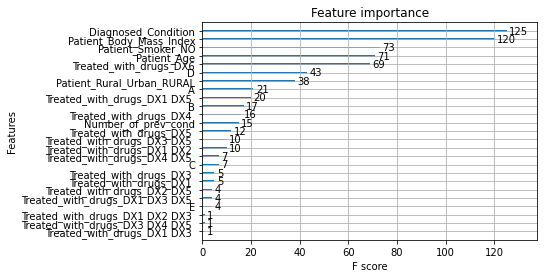

In [204]:
print("Feature Importances : ", xgbmodel.feature_importances_)

# plot feature importance
plot_importance(xgbmodel)
plt.show()

In [205]:
selection = SelectFromModel(xgbmodel)
selection.fit(X, y)

# Transform the train and test features
select_X_train = selection.transform(X)
select_X_test = selection.transform(test) 


In [206]:
select_X_train.shape
y_train.shape

(16386,)

In [207]:

# train model
selection_model = XGBClassifier()
selection_model.fit(select_X_train, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [208]:
# define Boruta feature selection method
# boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
boruta_selector2 = BorutaPy(selection, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
boruta_selector2.fit(np.array(X), np.array(y))

KeyError: ignored

In [209]:
y_pred = xgbmodel.predict(test)

In [211]:
res = pd.DataFrame(y_pred)
res.index = test_new.index
res.columns = ["prediction"]
res.to_csv("prediction.csv")

In [115]:
# Evaluating the model
predictions = selection_model.predict(select_X_test)      # predict for selected features of X_test
xgb_accuracy = accuracy_score(y_test, predictions)        # Calculating accuracy score on test data
xgb_fscore = f1_score(y_test , predictions)               # Calculating F1 score on test data


# View The Accuracy Of Our Limited Feature (4 Features) Model
print("Limited Features XGBoost Model Accuracy:", xgb_accuracy)
print("Limited Features XGBoost Model F1 Score:", xgb_fscore)

Limited Features XGBoost Model Accuracy: 0.8262859234852645
Limited Features XGBoost Model F1 Score: 0.865523593595012


In [94]:
dtrain

In [109]:
X.shape

(21849, 47)